In [5]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [6]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [7]:
df.shape[0]

294478

In [8]:
df['user_id'].nunique()

290584

In [9]:
df['converted'].mean()

0.11965919355605512

In [10]:
treat_and_old = df.query('group == "treatment" and landing_page == "old_page"')
contr_and_new = df.query('group == "control" and landing_page == "new_page"')

temp_df = pd.concat([treat_and_old, contr_and_new], ignore_index=True)
temp_df.shape[0]

3893

In [11]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 5 columns):
user_id         3893 non-null int64
timestamp       3893 non-null object
group           3893 non-null object
landing_page    3893 non-null object
converted       3893 non-null int64
dtypes: int64(2), object(3)
memory usage: 152.1+ KB


In [12]:
treat_and_new = df.query('group == "treatment" and landing_page == "new_page"')
contr_and_old = df.query('group == "control" and landing_page == "old_page"')

df2 = pd.concat([treat_and_new, contr_and_old], ignore_index=True)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [14]:
df2['user_id'].nunique()

290584

In [15]:
# double check shape to confirm repeated user_id
df2.shape[0]

290585

In [16]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [17]:
df2.drop(1405, inplace=True)

In [18]:
# check shape to confirm
df2.shape[0]

290584

In [19]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [29]:
new_page_converted = df2['converted'].sample(n=df2.shape[0], replace=True)
new_page_converted = np.array(new_page_converted)

In [30]:
old_page_converted = df2['converted'].sample(n=df2.shape[0], replace=True)
old_page_converted = np.array(old_page_converted)

In [31]:
obs_diff = new_page_converted.mean() - old_page_converted.mean()

In [32]:
p_diffs = []

for i in range(10000):
    sample_new = np.random.choice(new_page_converted, size=df2.shape[0], replace=True)
    conversion_rate_new = sample_new.mean()
    sample_old = np.random.choice(old_page_converted, size=df2.shape[0], replace=True)
    conversion_rate_old = sample_old.mean()
    diff = conversion_rate_new - conversion_rate_old
    p_diffs.append(diff)

In [33]:
print(len(p_diffs))
p_diffs = np.array(p_diffs)
type(p_diffs)

10000


numpy.ndarray

In [34]:
null_vals = np.random.normal(0, np.std(p_diffs), 10000)

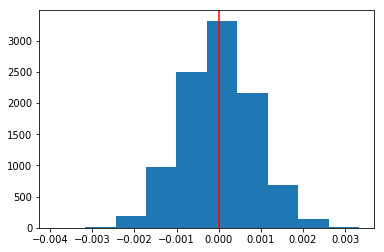

In [26]:
plt.hist(null_vals)

plt.axvline(obs_diff, c='red');

In [27]:
prob_more_extreme_high = (null_vals > obs_diff).mean()

pval = prob_more_extreme_high
pval

0.5023

The p-value of 0.4805 is far above our alpha of 0.05, therefore we fail to reject the null. We do not have statistical evidence that the new page increases the conversion rate.